In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

# ann and dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

import tensorflow as tf
import random as rn

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
import os
os.chdir("/content/gdrive/")
!ls

Mounted at /content/gdrive
MyDrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/TechnoCollab/Employee.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Handling missing values
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
#Datatypes
print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Missing value check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

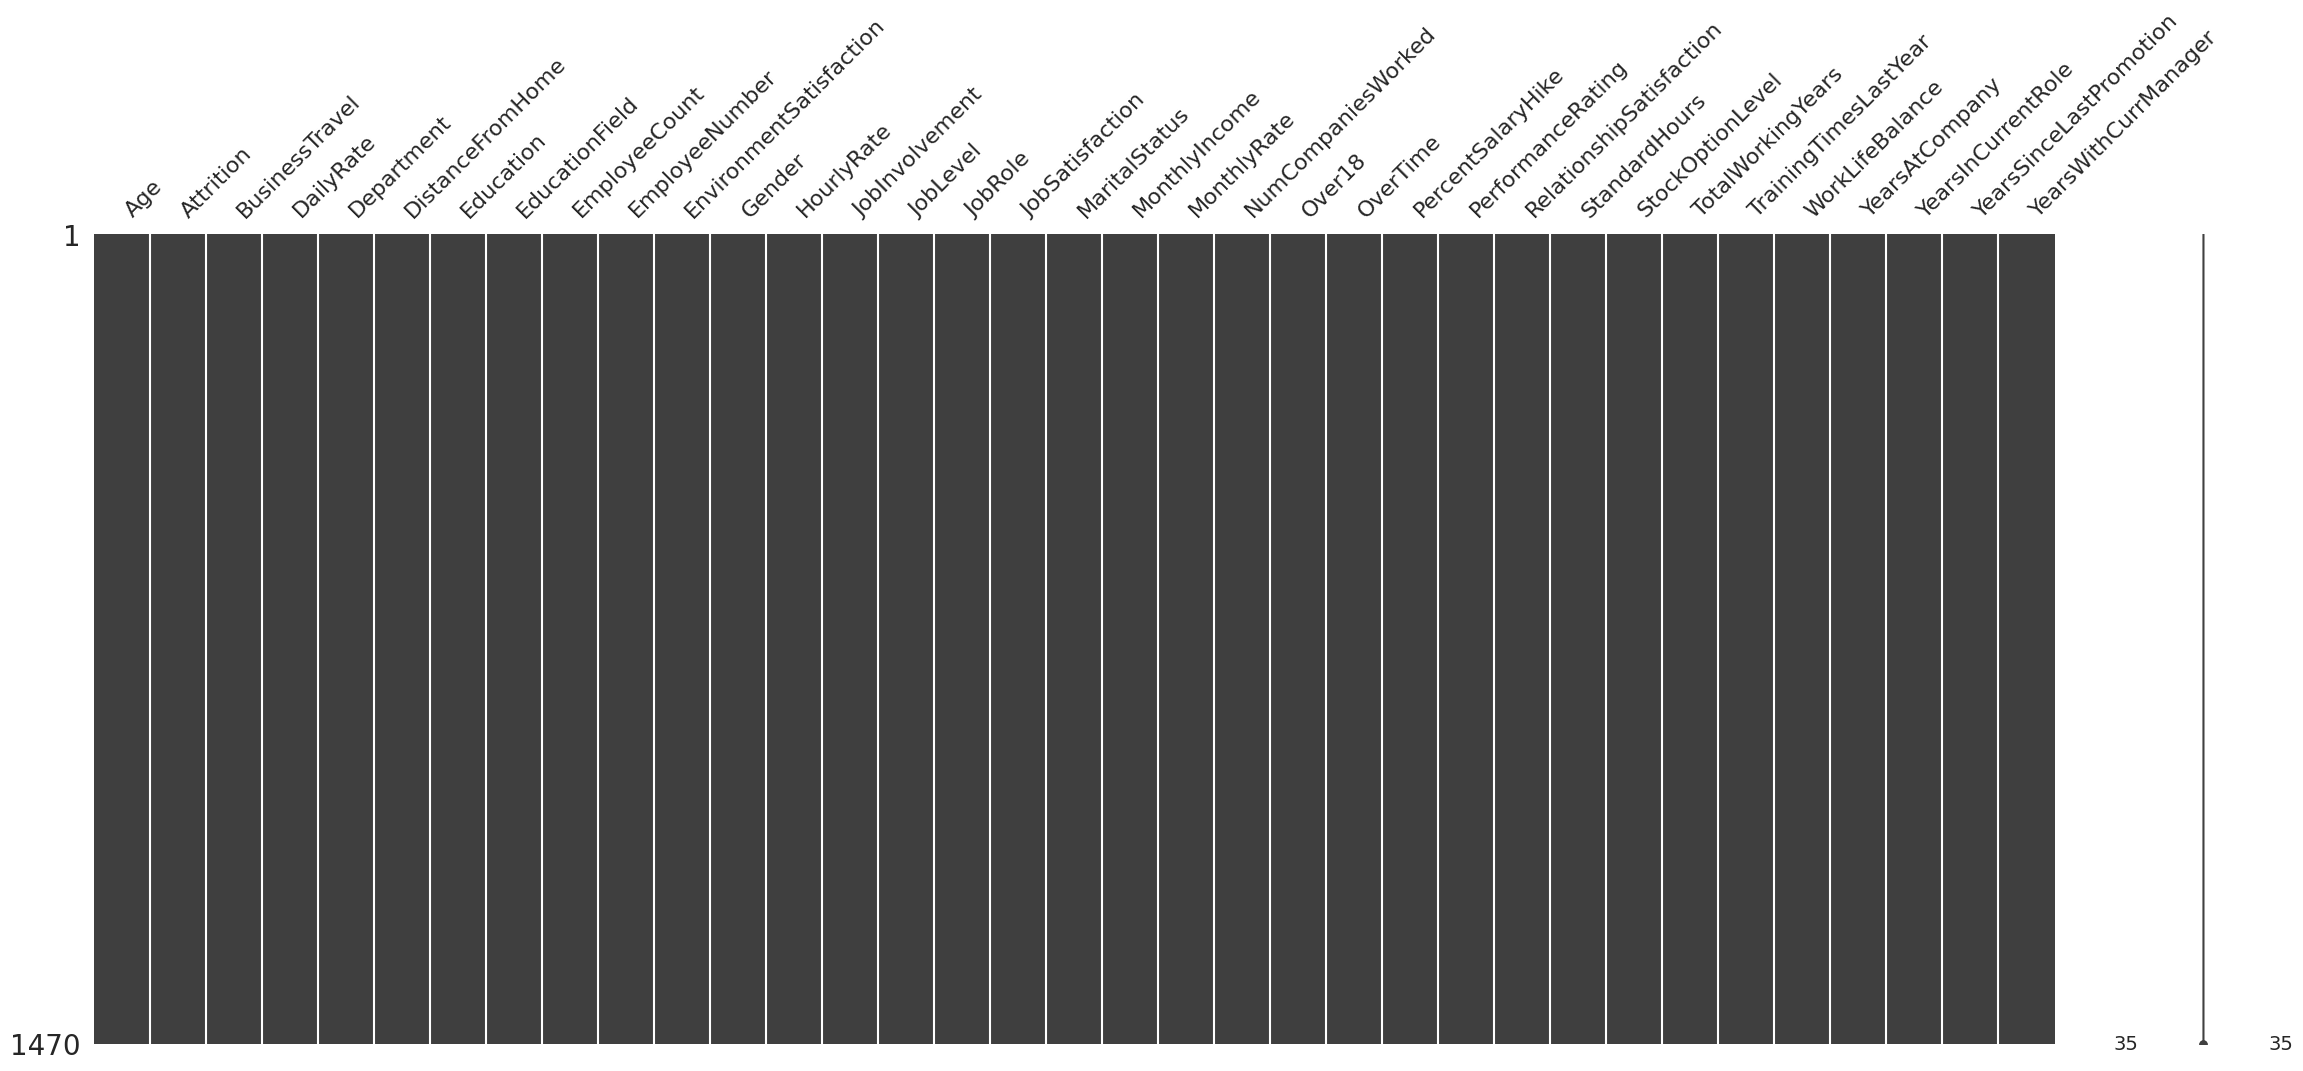

In [9]:
msno.matrix(df) # just to visualize.

Playing with Features and target

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Here there are 34 columns and 9 columns out of them are categorical.The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

In [13]:
#univariate analysis
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<Axes: xlabel='Age', ylabel='Density'>

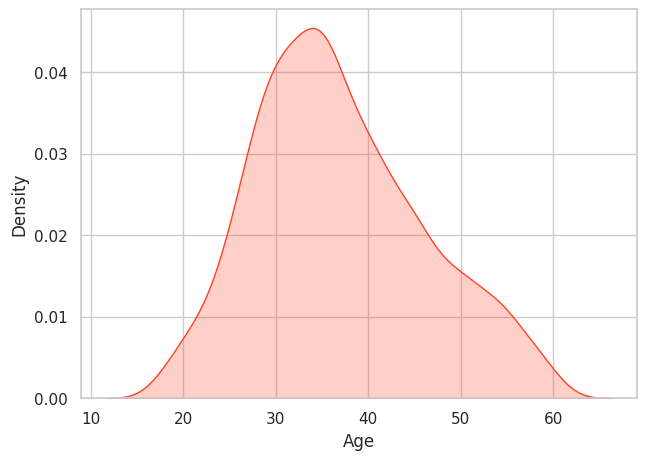

In [14]:
sns.kdeplot(df['Age'],shade=True,color='#ff4125')

<Axes: xlabel='Age', ylabel='Density'>

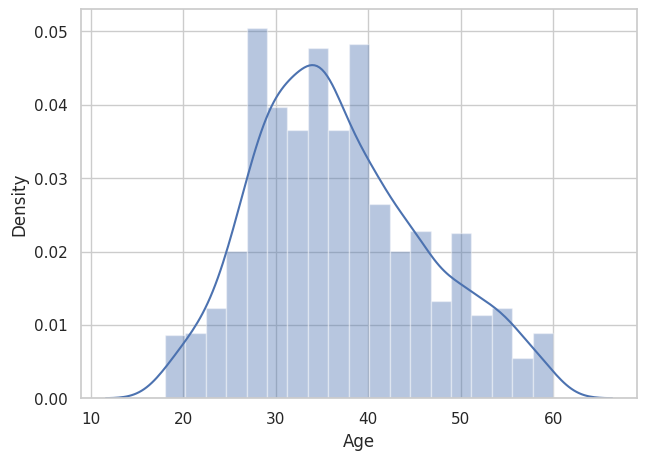

In [15]:
sns.distplot(df['Age'])

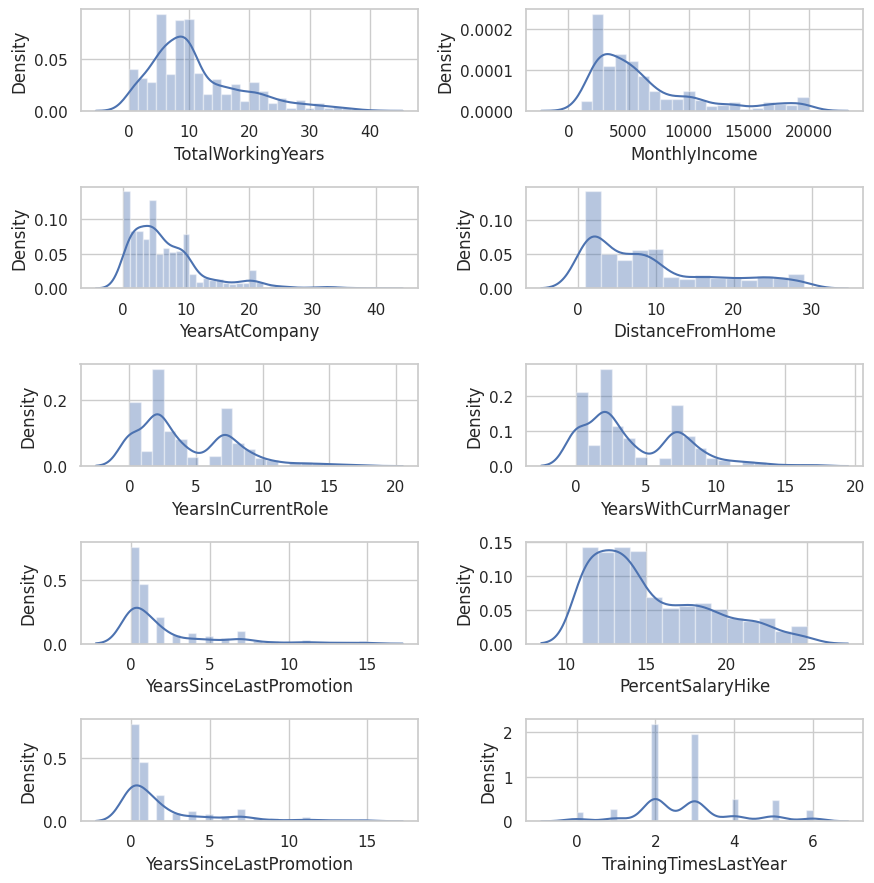

In [16]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(9,9))
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0])
sns.distplot(df['MonthlyIncome'], ax = ax[0,1])
sns.distplot(df['YearsAtCompany'], ax = ax[1,0])
sns.distplot(df['DistanceFromHome'], ax = ax[1,1])
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0])
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1])
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0])
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1])
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0])
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1])
plt.tight_layout()
plt.show()

Let us now analyze the various categorical features. Note that in these cases the best way is to use a count plot to show the relative count of observations of different categories.

In [17]:
cat_df=df.select_dtypes(include='object')

In [18]:
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [19]:
def plot_cat(attr, labels=None):
    if(attr=='JobRole'):
        sns.catplot(data=df,kind='count',aspect=3,x=attr)
        return

    sns.catplot(data=df,kind='count',aspect=1.5,x=attr)

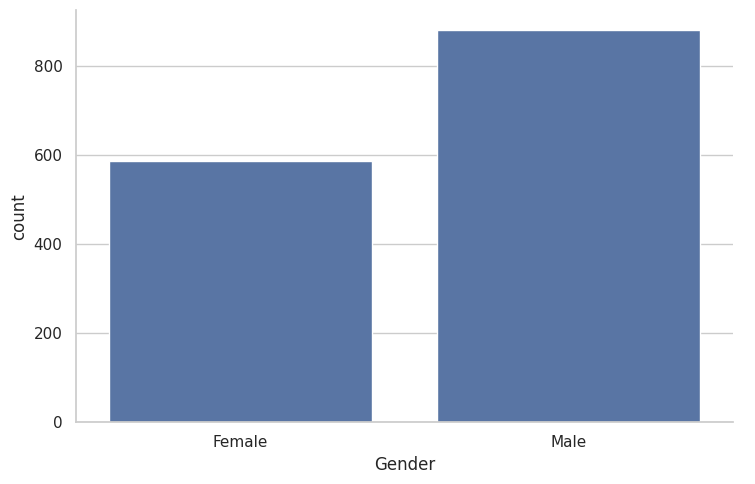

In [20]:
plot_cat('Gender')

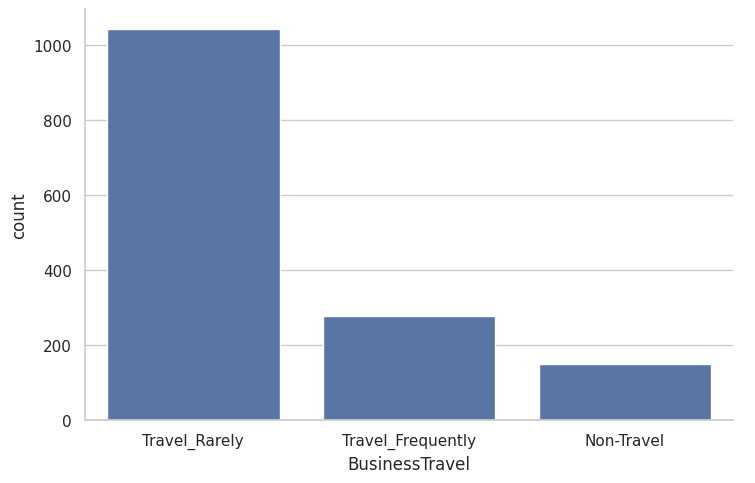

In [21]:
plot_cat('BusinessTravel')

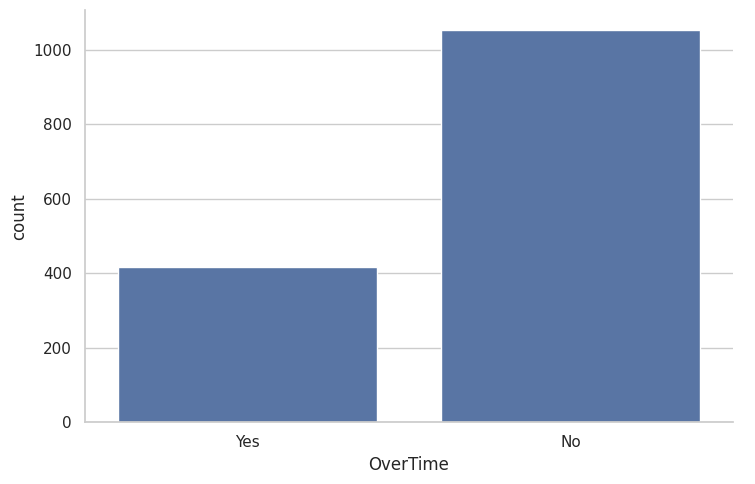

In [22]:
plot_cat('OverTime')

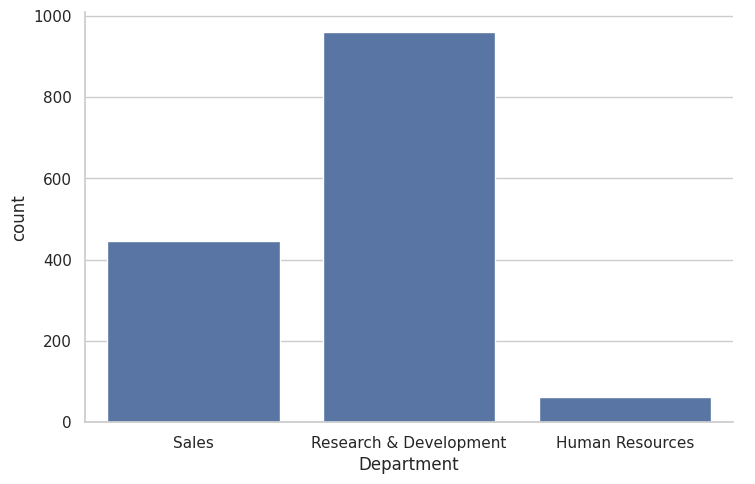

In [23]:
plot_cat('Department')

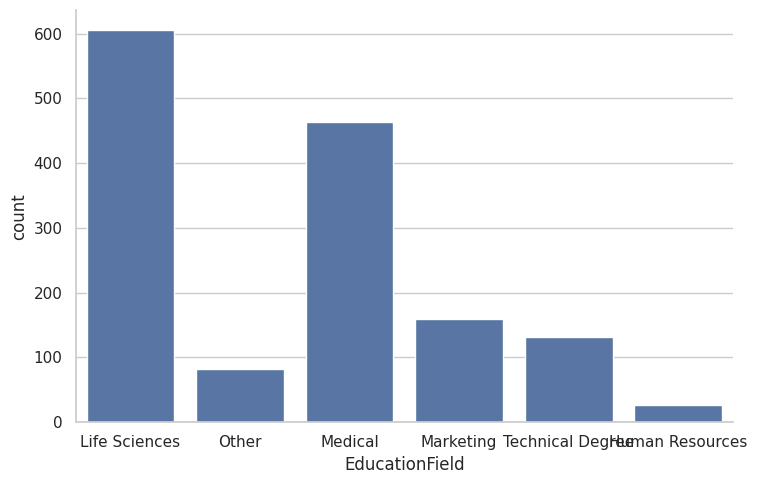

In [24]:
plot_cat('EducationField')

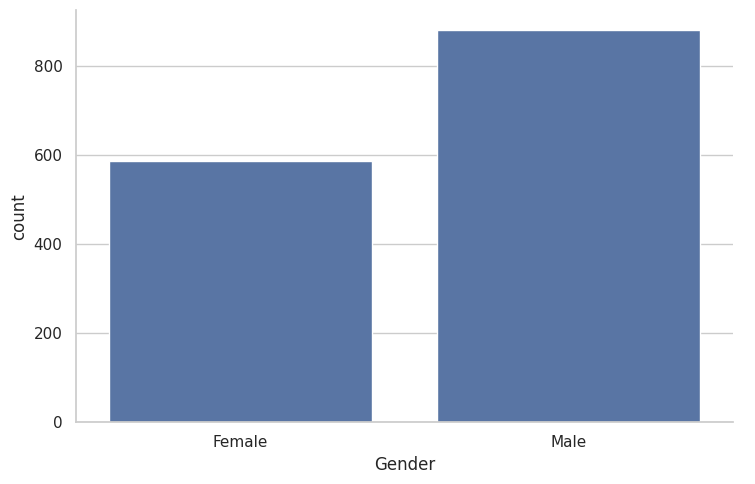

In [25]:
plot_cat('Gender')

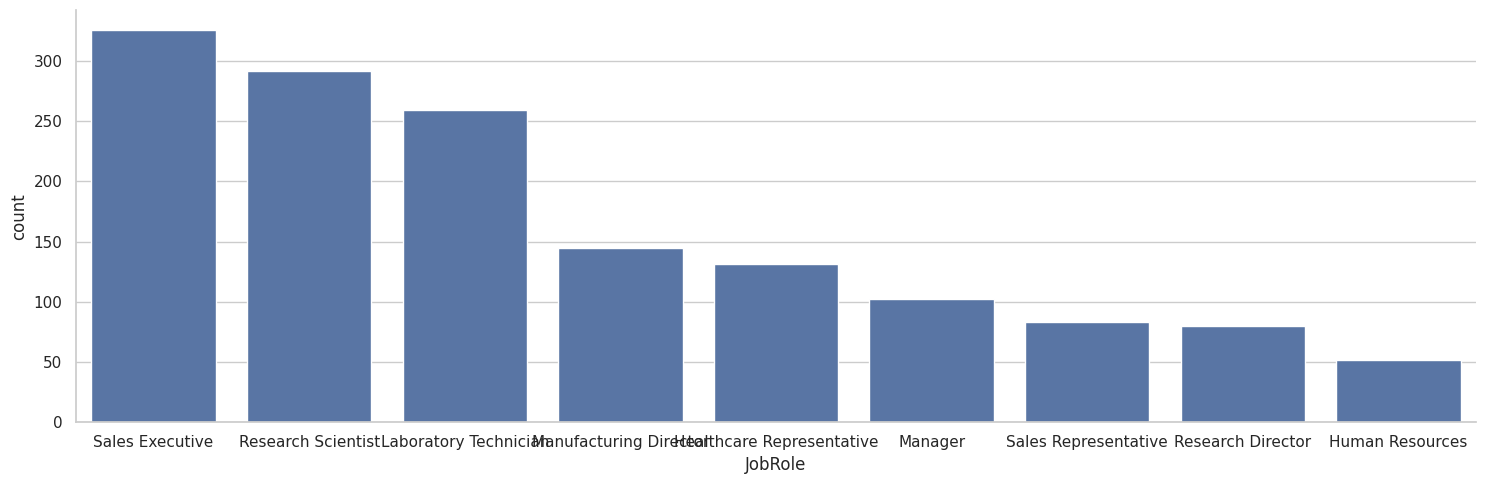

In [26]:
plot_cat('JobRole')

Now let us tryfeature engineering

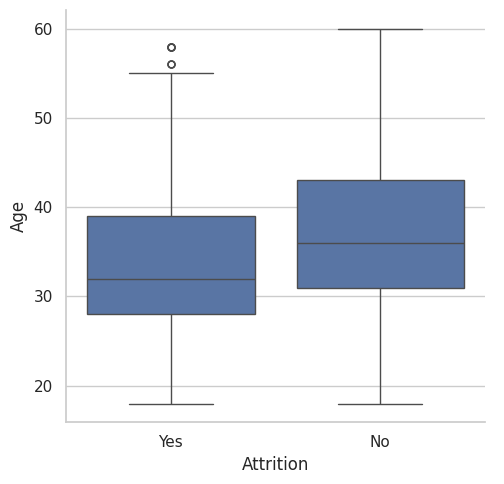

In [27]:
sns.catplot(data=df,y='Age',x='Attrition',aspect=1,kind='box')

In [28]:
df.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

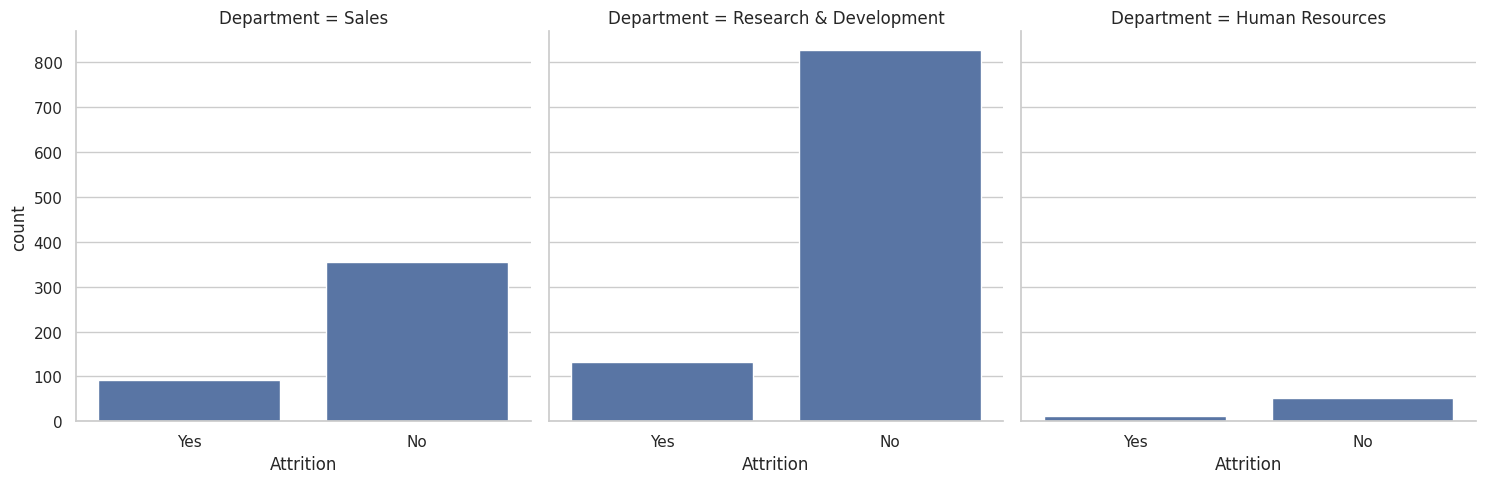

In [29]:
sns.catplot(data=df,kind='count',x='Attrition',col='Department')

In [30]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index')

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


In [31]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index')

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


In [32]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index')

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


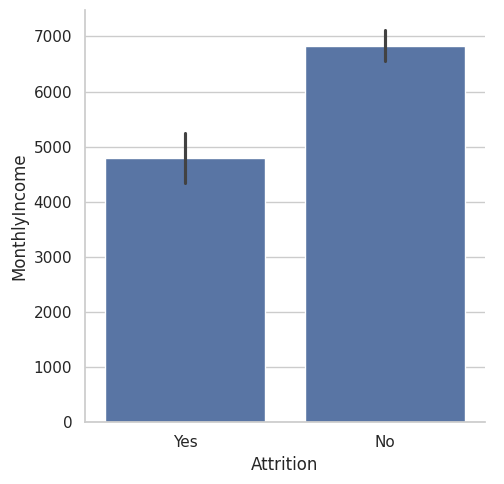

In [33]:
sns.catplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

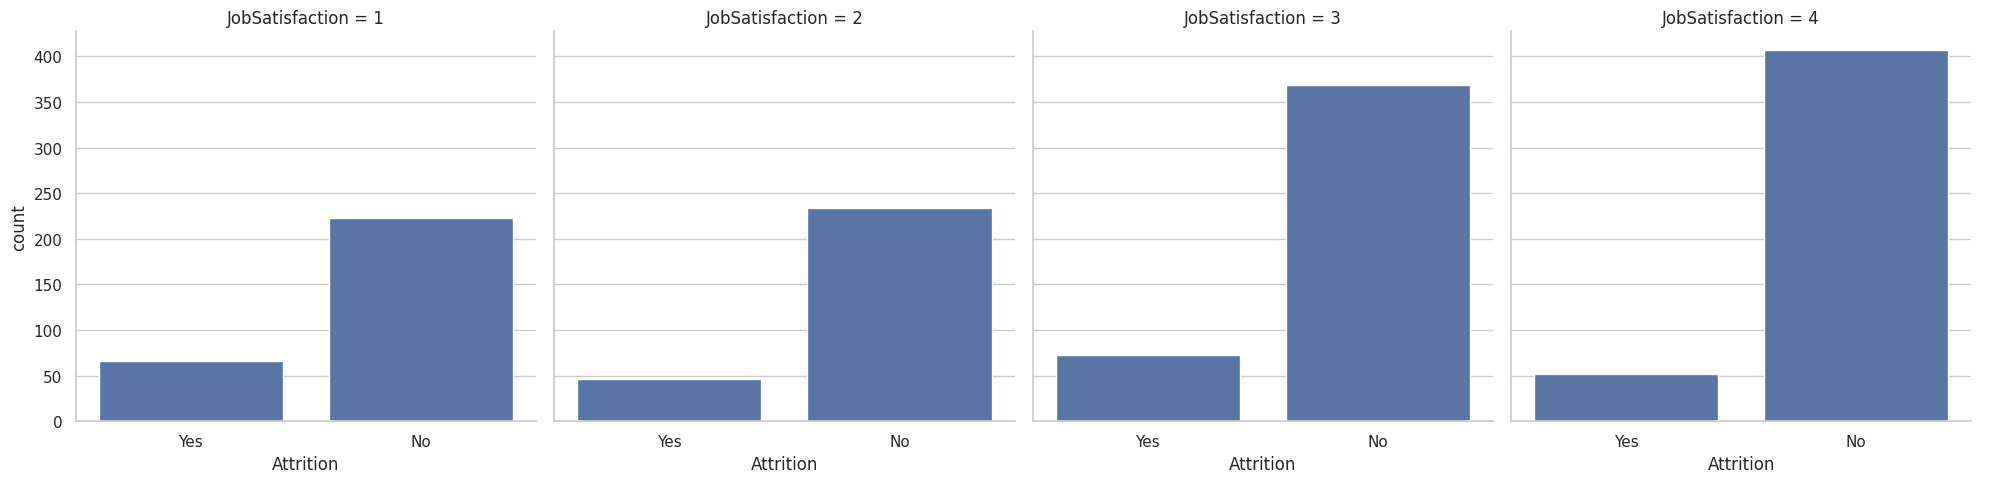

In [34]:
sns.catplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [35]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


In [36]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


In [37]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index')

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


In [38]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index')

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


In [39]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


Feature Selection

In [40]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
           ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

In [41]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [42]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [43]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [44]:
df.head() # just to verify.

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,...,1,11,3,1,8,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,...,0,23,4,4,10,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,...,1,15,3,2,7,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,...,1,11,3,3,8,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,...,0,12,3,4,6,3,2,2,2,2


In [57]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition']

In [58]:
Y=to_categorical(Y)
Y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [54]:
#y_train = tf.one_hot(y_train, depth=4)

In [55]:
print (y_train)

tf.Tensor(
[[[[1. 0. 0. 0.]
   [0. 1. 0. 0.]]

  [[0. 1. 0. 0.]
   [1. 0. 0. 0.]]]


 [[[1. 0. 0. 0.]
   [0. 1. 0. 0.]]

  [[0. 1. 0. 0.]
   [1. 0. 0. 0.]]]


 [[[1. 0. 0. 0.]
   [0. 1. 0. 0.]]

  [[0. 1. 0. 0.]
   [1. 0. 0. 0.]]]


 ...


 [[[0. 1. 0. 0.]
   [1. 0. 0. 0.]]

  [[1. 0. 0. 0.]
   [0. 1. 0. 0.]]]


 [[[1. 0. 0. 0.]
   [0. 1. 0. 0.]]

  [[0. 1. 0. 0.]
   [1. 0. 0. 0.]]]


 [[[1. 0. 0. 0.]
   [0. 1. 0. 0.]]

  [[0. 1. 0. 0.]
   [1. 0. 0. 0.]]]], shape=(1102, 2, 2, 4), dtype=float32)


In [60]:
#FOR Bi-LSTM
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Bidirectional, LSTM, Dense
#from sklearn.metrics import classification_report
#from sklearn.model_selection import KFold
#from tensorflow.keras.layers import Dropout

# Define the model
#model = Sequential()
#model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(x_train.shape[1], 1)))
#model.add(Dropout(0.2))
#model.add(Bidirectional(LSTM(units=50)))
#model.add(Dropout(0.2))
#model.add(Dense(units=4, activation='sigmoid'))

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#model.fit(x_train, y_train, epochs=10, batch_size=32)

In [61]:
#FOR ANN
np.random.seed(42)

In [62]:
rn.seed(42)

In [63]:
tf.set_random_seed(42)

AttributeError: module 'tensorflow' has no attribute 'set_random_seed'

In [64]:
model=Sequential()
model.add(Dense(input_dim=23,units=8,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=2,activation='sigmoid'))

In [65]:
model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 192       
                                                                 
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 2)                 34        
                                                                 
Total params: 370 (1.45 KB)
Trainable params: 370 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
History=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1)

Epoch 1/10
35/35 [==============================] - 1s 11ms/step - loss: 0.8055 - accuracy: 0.4201 - val_loss: 0.7093 - val_accuracy: 0.5489
Epoch 2/10
35/35 [==============================] - 1s 16ms/step - loss: 0.6504 - accuracy: 0.6679 - val_loss: 0.5763 - val_accuracy: 0.8098
Epoch 3/10
35/35 [==============================] - 0s 7ms/step - loss: 0.5580 - accuracy: 0.8004 - val_loss: 0.4908 - val_accuracy: 0.8641
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.8303 - val_loss: 0.4365 - val_accuracy: 0.8723
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.8294 - val_loss: 0.4071 - val_accuracy: 0.8723
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4423 - accuracy: 0.8294 - val_loss: 0.3898 - val_accuracy: 0.8696
Epoch 7/10
35/35 [==============================] - 0s 11ms/step - loss: 0.4280 - accuracy: 0.8294 - val_loss: 0.3801 - val_accuracy: 0.8723
Epoch 8/10
35/35 

In [69]:
model.predict(x_test)

12/12 [==============================] - 0s 6ms/step


array([[0.72292054, 0.23407483],
       [0.95050526, 0.04502295],
       [0.8996998 , 0.09362093],
       [0.98324484, 0.02726006],
       [0.91180766, 0.12379608],
       [0.7694407 , 0.13518128],
       [0.7602937 , 0.26273653],
       [0.90904874, 0.13741477],
       [0.82567286, 0.18063156],
       [0.93948644, 0.09052951],
       [0.71640754, 0.18844356],
       [0.9606935 , 0.05786329],
       [0.76782346, 0.264453  ],
       [0.7853578 , 0.21972045],
       [0.78483933, 0.21677677],
       [0.87267214, 0.09518667],
       [0.747525  , 0.24990489],
       [0.9355442 , 0.09568834],
       [0.7846539 , 0.20125803],
       [0.9448108 , 0.04852043],
       [0.7640363 , 0.27050287],
       [0.97567457, 0.04168897],
       [0.81232274, 0.1769403 ],
       [0.8878473 , 0.06382984],
       [0.90726686, 0.12050898],
       [0.9426418 , 0.06160289],
       [0.8018419 , 0.23918033],
       [0.8460742 , 0.12864058],
       [0.83609605, 0.19380876],
       [0.88594484, 0.15215912],
       [0.

In [70]:
model.evaluate(x_test,y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.8723


[0.3602024018764496, 0.8722826242446899]

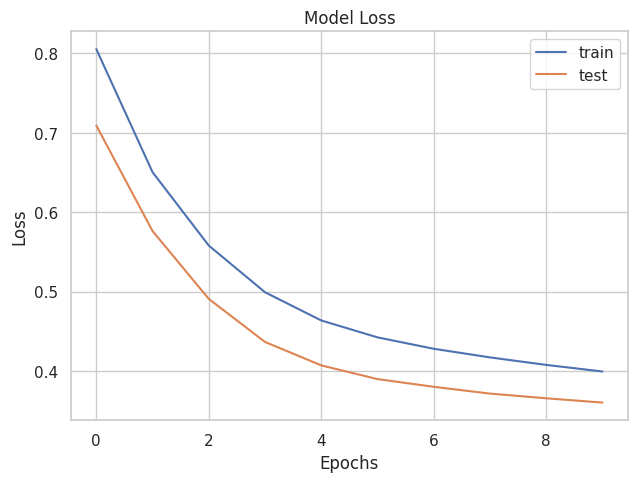

In [71]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

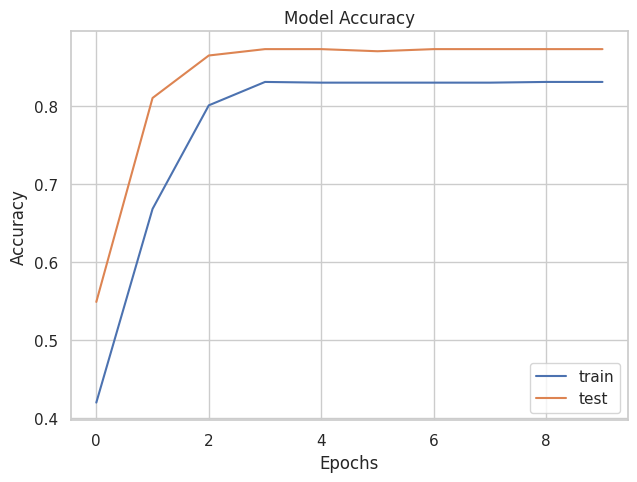

In [73]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [77]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [81]:
# Evaluate the model on the test set
y_test_pred_prob = model.predict(x_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_true = np.argmax(y_test, axis=1)

12/12 [==============================] - 0s 2ms/step


In [82]:
# Print classification report
print(classification_report(y_test_true, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       1.00      0.02      0.04        48

    accuracy                           0.87       368
   macro avg       0.94      0.51      0.49       368
weighted avg       0.89      0.87      0.82       368



In [83]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_true, y_test_pred)

In [84]:
# Evaluate the model
precision = precision_score(y_test_true, y_test_pred, average= "weighted")
recall = recall_score(y_test_true, y_test_pred, average= "weighted")
f1score = f1_score(y_test_true, y_test_pred, average= "weighted")

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1score)

Precision: 0.8886387868735932
Recall: 0.8722826086956522
F1 Score: 0.8153991803670395
